In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Part 1 : Loading the dataset; Preliminary Analysis<h2>

In [3]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h3>Now we will determine the size of the dataset<h3>

In [5]:
diamonds.shape

(53940, 10)

<h3>We will now inspect the distribution of columns in diamonds<h3>

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h2>Part 2 : Filtering and Sorting<h2>
<h5>We will start viewing information about 5 most expensive diamonds in the dataset<h5>

In [7]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False).head(10)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1
27745,18797,2.29,Premium,I,SI1
27743,18795,2.04,Premium,H,SI1
27744,18795,2.00,Premium,I,VS1
27741,18791,1.71,Premium,F,VS2
27742,18791,2.15,Ideal,G,SI2


<h3>we will now view five least expensive diamonds in the dataset<h3>

In [8]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=True).head(10)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2
6,336,0.24,Very Good,J,VVS2
7,336,0.24,Very Good,I,VVS1
8,337,0.26,Very Good,H,SI1
9,337,0.22,Fair,E,VS2
10,338,0.23,Very Good,H,VS1


<h3>We will now view information about the five largest diamonds in the dataset with an ideal cut <h3>

In [9]:
diamonds[['price', 'carat', 'cut', 'color', 'clarity']][diamonds['cut'] == 'Fair'].sort_values(by='carat', ascending=False).head(10)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1
21759,9823,3.11,Fair,J,I1
22541,10577,3.02,Fair,I,I1
27517,18242,3.01,Fair,I,SI2
27516,18242,3.01,Fair,I,SI2
22742,10761,3.01,Fair,H,I1


<h2>Part : 3 Working with Categorical Variables<h2>
<h5>We will create lists to specify the order for each of the following three categorical variables.<h5>

In [10]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

<h5> we will now use these lists to communicate to pandas the correct orders of the three categorical variables<h5>

In [11]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=clarity_levels, ordered=True)
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=cut_levels, ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'], categories=color_levels, ordered=True)

<h5> we will now create list of named colors to serve as palettes to be used for visualizations later in notebook.<h5>

In [12]:
clarity_pal = ['lightcoral', 'lightsalmon', 'gold', 'lightgreen', 'darkseagreen', 'deepskyblue', 'royalblue', 'mediumpurple']
cut_pal = ['lightcoral', 'lightsalmon', 'gold', 'lightgreen', 'darkseagreen']
color_pal = ['lightcoral', 'lightsalmon', 'gold', 'lightgreen', 'darkseagreen', 'deepskyblue', 'royalblue']

<h2>Part 4 : Displaying Counts for categorical variables<h2>
<h5>We will start by counting the number of diamonds for each level of cut<h5>

In [13]:
diamonds['cut'].value_counts().sort_index()

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

<h5>We will now count the number of diamonds for each level of color<h5>

In [14]:
diamonds['color'].value_counts().sort_index()

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64

<h5>We will now count the number of diamonds for each level of clarity<h5>

In [15]:
diamonds['clarity'].value_counts().sort_index()

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64

<h2>Part 5: Scatterplots of Price Against Carat<h5>
<h5>We will start visualizations by exploring the relationship between the price and carat attributes by generating scatter plots<h5>

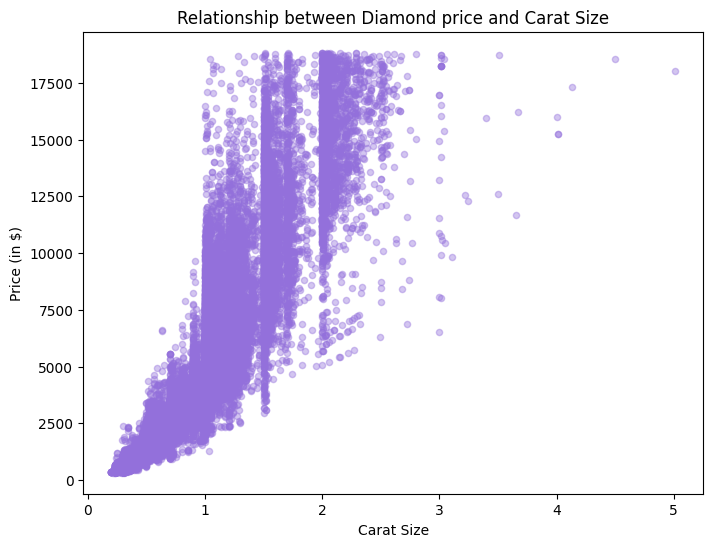

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.4, color='mediumpurple')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond price and Carat Size')
plt.show()

<h5>We will reproduce the plot from above, but now we will color the points according to clarity<h5>

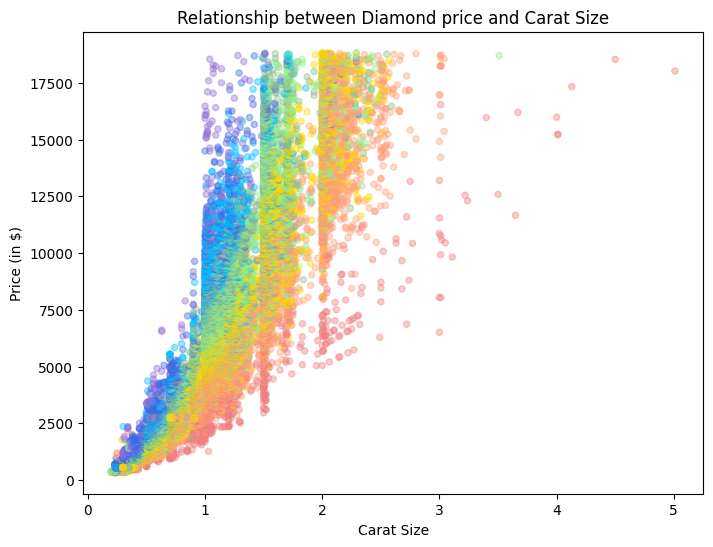

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.4, color=diamonds['clarity'].map(dict(zip(clarity_levels, clarity_pal))))
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond price and Carat Size')
plt.show()


<h5> We will now separate the points for each of the eight clarity levels into its own subplot<h4>

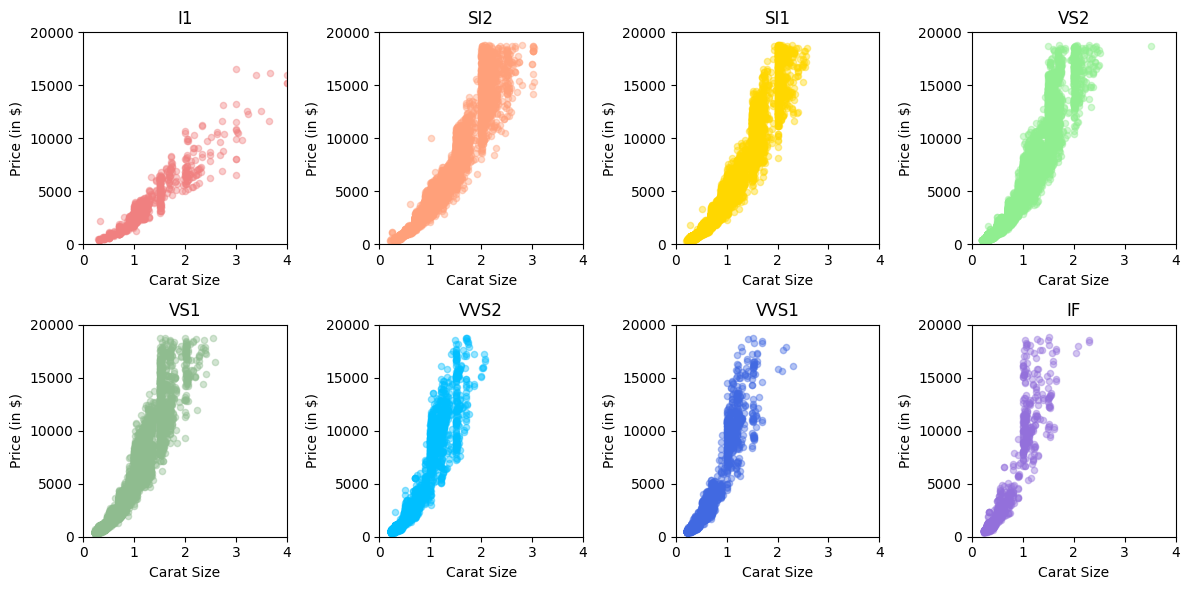

In [20]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

for i, level in enumerate(clarity_levels):
    ax[i//4, i%4].scatter(diamonds['carat'][diamonds['clarity'] == level], diamonds['price'][diamonds['clarity'] == level], s=20, alpha=0.4, color=clarity_pal[i])
    ax[i//4, i%4].set_title(level)
    ax[i//4, i%4].set_xlim(0, 4)
    ax[i//4, i%4].set_ylim(0, 20000)
    ax[i//4, i%4].set_xlabel('Carat Size')
    ax[i//4, i%4].set_ylabel('Price (in $)')
plt.tight_layout()
plt.show()

<h2>Part 6: Applying Logarithmic Transformations<h2>
<h5>We will start by adding two new columns to the diamonds in order to store the transformed variables<h5>

In [22]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])


<h5>We will now use histograms to explore the distribution of diamond prices, and the log of diamond prices<h5>

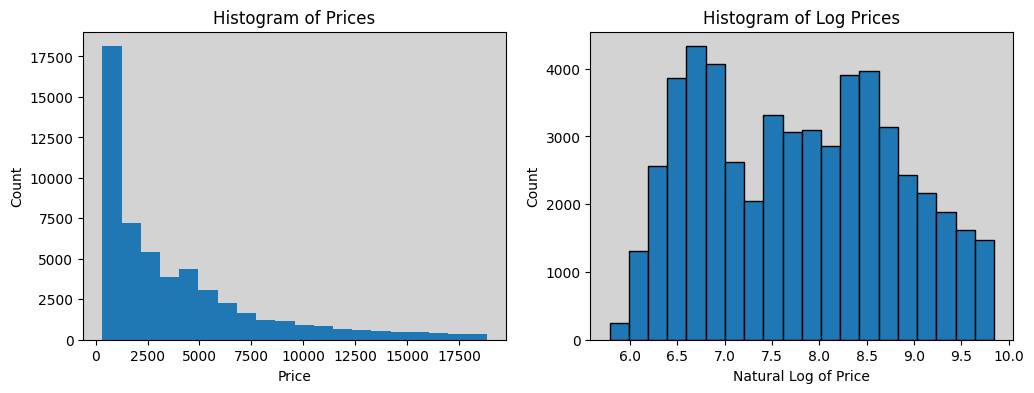

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_xlabel('Price')
ax[1].set_xlabel('Natural Log of Price')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_title('Histogram of Prices')
ax[1].set_title('Histogram of Log Prices')
ax[0].hist(diamonds['price'], bins=20)
ax[1].hist(diamonds['ln_price'], bins=20, edgecolor='black')
ax[0].set_facecolor('lightgrey')
ax[1].set_facecolor('lightgrey')
plt.show()


<h2>Part 7 : Scatterplot of Transformed Variables<h2>
<h5>We will start by creating a scatter plot of ln_price against ln_carat, with points colored according to their clarity<h5>

Text(0.5, 1.0, 'Relationship between Log-price and Log-Carat Size')

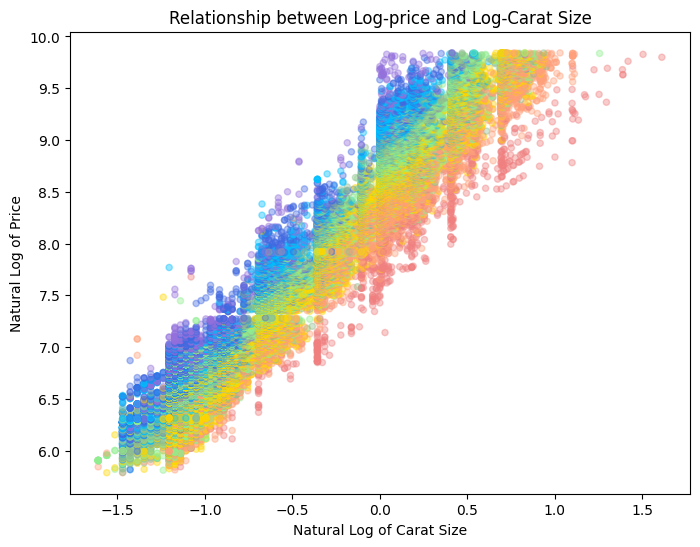

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(diamonds['ln_carat'], diamonds['ln_price'], s=20, alpha=0.4, color=diamonds['clarity'].map(dict(zip(clarity_levels, clarity_pal))))
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-price and Log-Carat Size')


<h2>Part 8: Grouping by Cut<h2>
<h5>We will create a grouped dataframe displaying the mean price and carat size for each cut level<h5>

In [26]:
gb_cut = diamonds.groupby('cut')[['price', 'carat']].mean()
gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


<h5>We will now use barcharts to graphically display the information from the gb_cut dataframe<h5>

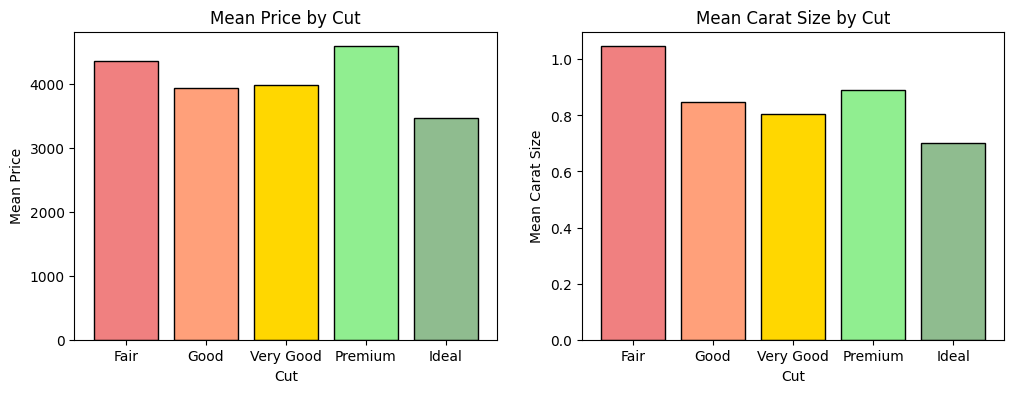

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_xlabel('Cut')
ax[1].set_xlabel('Cut')
ax[0].set_ylabel('Mean Price')
ax[1].set_ylabel('Mean Carat Size')
ax[0].set_title('Mean Price by Cut')
ax[1].set_title('Mean Carat Size by Cut')
ax[0].bar(gb_cut.index, gb_cut['price'], color=cut_pal, edgecolor='black')
ax[1].bar(gb_cut.index, gb_cut['carat'], color=cut_pal, edgecolor='black')
plt.show()

<h2>Part 9: Grouping by Color<h2>
<h5>We will start by creating a grouped dataframe displaying the mean price and carat size for each color level<h5>

In [30]:
gb_color = diamonds.groupby('color')[['price', 'carat']].mean()
gb_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


<h5> We will now use Bar charts to graphically display the information from gb_color<h5>

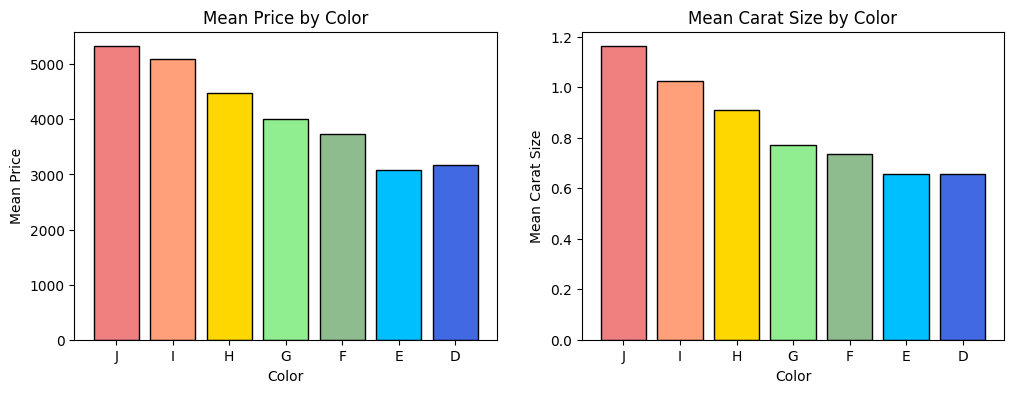

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_xlabel('Color')
ax[1].set_xlabel('Color')
ax[0].set_ylabel('Mean Price')
ax[1].set_ylabel('Mean Carat Size')
ax[0].set_title('Mean Price by Color')
ax[1].set_title('Mean Carat Size by Color')
ax[0].bar(gb_color.index, gb_color['price'], color=color_pal, edgecolor='black')
ax[1].bar(gb_color.index, gb_color['carat'], color=color_pal, edgecolor='black')
plt.show()

<h5>Part 10: Grouping by Clarity<h5>
<h5>In this part we will create a grouped dataframe displaying the mean price and carat size for each clarity level<h5>


In [32]:
gb_clarity = diamonds.groupby('clarity')[['price', 'carat']].mean()
gb_clarity

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


<h5>We will now use bar charts to graphically display the information from gb_clarity dataframe<h5>

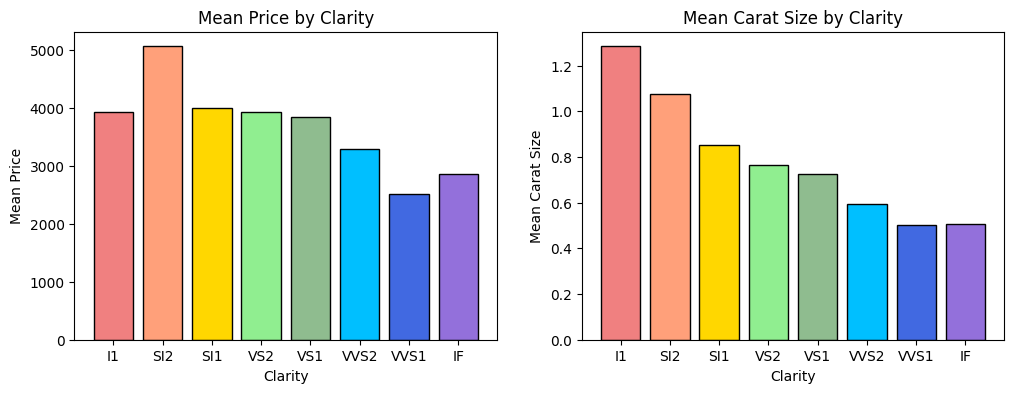

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_xlabel('Clarity')
ax[1].set_xlabel('Clarity')
ax[0].set_ylabel('Mean Price')
ax[1].set_ylabel('Mean Carat Size')
ax[0].set_title('Mean Price by Clarity')
ax[1].set_title('Mean Carat Size by Clarity')
ax[0].bar(gb_clarity.index, gb_clarity['price'], color=clarity_pal, edgecolor='black')
ax[1].bar(gb_clarity.index, gb_clarity['carat'], color=clarity_pal, edgecolor='black')
plt.show()